In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import clear_output 
import os
from IPython.display import HTML
from base64 import b64encode
from heapq import heappop, heappush

%matplotlib inline

(0.0, 140.0)

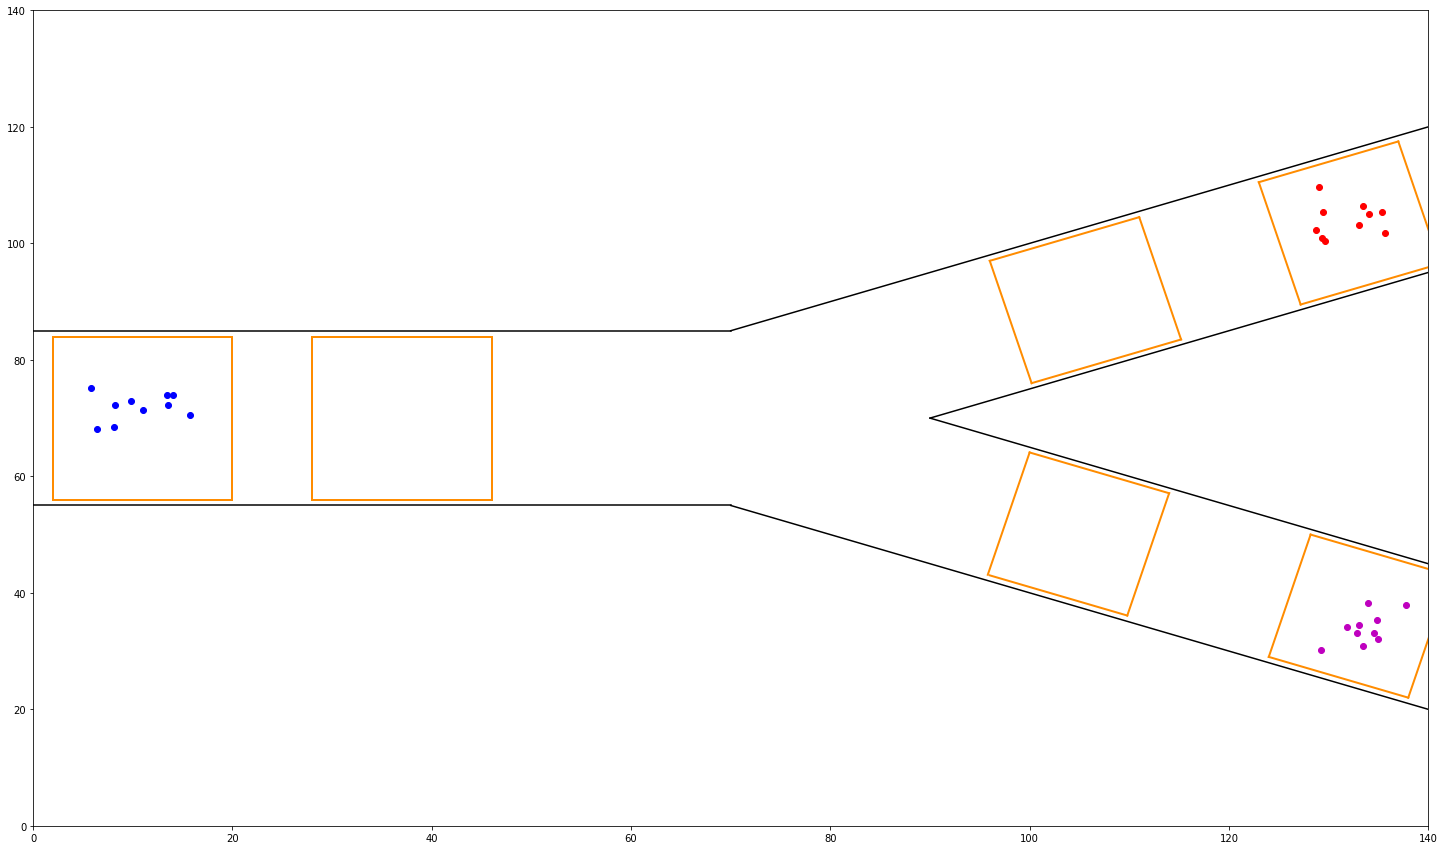

In [3]:
# Width and Height of Road
xSize=140
ySize=140

# Crowd Amount
N=10

# 0, 10 -> Assuming that this is 0 to 10 spread
# (N, 2) -> N crowds, with 2D (x,y)
# + [5, 65] minimum X, minimum Y
posL = np.random.uniform(0,12,(N,2)) +[5,65]
posR_top = np.random.uniform(0,10,(N,2)) +[128,100] 
posR_bottom = np.random.uniform(0,10,(N,2)) +[128,30] 

# plt.plot(posL[:,0],posL[:,1],color='red',marker='o',linestyle=' ')

plt.figure(figsize=(25,15))
plt.plot(posL[:,0],posL[:,1],'bo')
plt.plot(posR_top[:,0],posR_top[:,1],'ro')
plt.plot(posR_bottom[:,0],posR_bottom[:,1],'mo')

plt.plot(85*np.ones((70+1,1)),'k') # Top horizontal
plt.plot(55*np.ones((70+1,1)),'k') # Bottom horizontal

# Top Nerve - Gradient of 0.5
plt.plot([70,150],[85,125],'k')  # Top Nerve
plt.plot([90,150],[70,100],'k')  # Bottom Nerve

# Bottom Nerve - Gradient of -0.5
plt.plot([90,150],[70,40],'k')  # Top Nerve
plt.plot([70,150],[55,15],'k')  # Bottom Nerve

# Left box - 1
plt.plot([2, 20], [84, 84], color='darkorange', linewidth=2) # Top
plt.plot([2, 2], [56, 84], color='darkorange', linewidth=2) # Left
plt.plot([2, 20], [56, 56], color='darkorange', linewidth=2) # Bottom
plt.plot([20, 20], [56, 84], color='darkorange', linewidth=2) # Right

# Left box - 2
plt.plot([28, 46], [84, 84], color='darkorange', linewidth=2) # Top
plt.plot([28, 28], [56, 84], color='darkorange', linewidth=2) # Left
plt.plot([28, 46], [56, 56], color='darkorange', linewidth=2) # Bottom
plt.plot([46, 46], [56, 84], color='darkorange', linewidth=2) # Right

# Right Top Box - Right
plt.plot([123,137],[110.5,117.5],color='darkorange', linewidth=2) # Top , Equation -> y =  0.5x + 49
plt.plot([123,127.2],[110.5,89.5],color='darkorange', linewidth=2) # Left , Equation -> y = -5x + 725.5
plt.plot([127.2,141.2],[89.5,96.5],color='darkorange', linewidth=2) # Bottom , Equation -> y = 0.5x + 25.9
plt.plot([137,141.2],[117.5,96.5],color='darkorange', linewidth=2) # Right , Equation -> y = -5x + 802.5

# Right Top Box - Left
plt.plot([96,111],[97,104.5],color='darkorange', linewidth=2) # Top , Equation -> y =  0.5x + 49
plt.plot([100.2,115.2],[76,83.5],color='darkorange', linewidth=2) # Bottom , Equation -> y = 0.5x + 25.9
plt.plot([111,115.2],[104.5,83.5],color='darkorange', linewidth=2) # Right , Equation -> y = -5x + 659.5
plt.plot([96,100.2],[97,76],color='darkorange', linewidth=2) # Left , Equation -> y = -5x + 577


# Right Bottom Box - Right
plt.plot([124,128.2],[29,50],color='darkorange', linewidth=2) # Left , Equation -> y = 5x - 591 
plt.plot([124,138],[29,22],color='darkorange', linewidth=2) # Bottom , Equation -> y = -0.5x + 91
plt.plot([128.2,142],[50,43.1],color='darkorange', linewidth=2) # Top , Equation -> y = -0.5x + 114.1
plt.plot([138,142.2],[22,43],color='darkorange', linewidth=2) # Right , Equation -> y = 5x - 668


# Right Bottom Box - Left
plt.plot([100,114],[64.1,57.1],color='darkorange', linewidth=2) # Top , Equation -> y = -0.5x + 114.1
plt.plot([96,109.8],[43,36.1],color='darkorange', linewidth=2) # Bottom , Equation -> y = -0.5x + 91
plt.plot([95.8,100],[43.1,64.1],color='darkorange', linewidth=2) # Left , Equation -> y = 5x - 435.9
plt.plot([109.8,114],[36.1,57.1],color='darkorange', linewidth=2) # Right , Equation -> y = 5x - 512.9

plt.ylim([0,ySize])
plt.xlim([0,xSize])

In [4]:
# This block of code finds the point which has the highest x value in the left cluster & the lowest y value in the right cluster.
# I've saved the index of both points as i will need their individual velocities aswell
# You do not need to run this block of code, i've just set it aside to explain things

# maxL = float('-inf')
# maxL_ind = 0

# for x in range(N):
#   if posL[x][0]>maxL:
#     maxL = posL[x][0]
#     maxL_ind = x

# minR = float('inf')
# minR_ind = 0

# for x in range(N):
#   if posR[x][0]<minR:
#     minR = posR[x][0]
#     minR_ind = x

In [5]:
# def find_max(position,index_needed):
#   Max = float('-inf')
#   Max_ind = 0
#   for x in range(len(position)):
#     if position[x][0]<Min:
#       Min = position[x][0]
#       Min_ind = x

#   if(index_needed==False):
#     return Max      
#   return Max, Max_ind

# def find_min(position,index_needed):
#   Min = float('inf')
#   Min_ind = 0
#   for x in range(len(position)):
#     if position[x][0]<Min:
#       Min = position[x][0]
#       Min_ind = x

#   if(index_needed==False):
#     return Min
      
#   return Min, Min_ind

In [6]:
  # maxR_top = max(posR_top[:,0])    
  # maxR_bottom = max(posR_bottom[:,0])

  # maxL = max(posL[:,0])
  # maxL_ind = (np.where(posL == np.amax(posL[:,0])))[0][0]
  
  # minR_top = min(posR_top[:,0])
  # minR_top_ind = (np.where(posR_top == np.amin(posR_top[:,0])))[0][0]
    
  # minR_bottom = min(posR_bottom[:,0])
  # minR_bottom_ind = (np.where(posR_bottom == np.amin(posR_bottom[:,0])))[0][0] 

In [7]:
!rm -r ./frames
!mkdir ./frames

posL = np.random.uniform(0,12,(N,2)) +[5,65]
posR_top = np.random.uniform(0,12,(N,2)) +[128,100] 
posR_bottom = np.random.uniform(0,12,(N,2)) +[128,28]

def applyVel(pos, vel, dt, bounds):
    pos=pos+dt*vel
    pos[:,0]=np.clip(pos[:,0], bounds[0], bounds[1])
    pos[:,1]=np.clip(pos[:,1], bounds[2], bounds[3])
    return pos

#simulation

T=92
noise=0.1 # This makes the points move at an angle.
dt=1
bounds_left=[0,xSize,55,85]
bounds_right_top=[0,xSize,97,112]
bounds_right_bottom=[0,xSize,26,43]


# The following three 2d arrays will store the 2 previous positions of every point for the left & right cluster respectively, to estimate their current velocity and simulate Optical Flo
previous_two_positions_L = np.zeros((N,2))
previous_two_positions_L_Later = np.zeros((N,2))
previous_two_positions_R_top = np.zeros((N,2)) 
previous_two_positions_R_bottom = np.zeros((N,2)) 

frame = 0
time_difference = np.zeros(T-2)
estimated_velocity_L = 0.0
estimated_velocity_R = 0.0

estimated_point_of_collision = 0.0
estimated_time_to_collision = 0.0

estimated_maxL_ind = 0
estimated_minR_top_ind = 0
estimated_minR_bottom_ind = 0

copy_L = posL
copy_R_top = posR_top
copy_R_bottom = posR_bottom

for i in range(T):
  frame += 1
  
  velL = noise*np.random.rand(N,2) +[0.4,-0.05] # Individual velocities of each point on the left are generated. These are moving towards the right
  velR_top = noise*np.random.rand(N,2) +[-0.8,-0.45] # Individual velocities of each point on the right_top are generated. These are moving towards the left
  velR_bottom = noise*np.random.rand(N,2) +[-0.8,+0.35] # Individual velocities of each point on the right_bottom are generated. These are moving towards the left

  copy_L = posL
  copy_R_top = posR_top
  copy_R_bottom = posR_bottom

  # The following two loops find the point which is the right most in both of the right clusters i.e Right_Top & Right_Bottom
  # I'm doing that to check if that point is at the location where the road is straight and not slanted anymore, hence the y-component of velocity is set to be closer to zero
  maxR_top = float('-inf')
  for x in range(N):
    if posR_top[x][0]>maxR_top:
      maxR_top = posR_top[x][0]
    
  maxR_bottom = float('-inf')
  for x in range(N):
    if posR_bottom[x][0]>maxR_bottom:
      maxR_bottom = posR_bottom[x][0]
  
  # The following two if conditions decrease the y-component velocity so that the points start moving horzizontally only after 80.
  if maxR_top<80:
    velR_top=noise*np.random.rand(N,2) +[-0.8,-0.15]

  if maxR_bottom<80:
    velR_bottom=noise*np.random.rand(N,2) +[-0.8,0]

  if maxR_top>80:
    bounds_right_top[2] -= 0.45 
    bounds_right_top[3] -= 0.45
  if maxR_bottom>80:
    bounds_right_bottom[2] += 0.35
    bounds_right_bottom[3] += 0.35
  
  # velocity for each cluster's each point is applied
  posL = applyVel(posL, velL, dt, bounds_left)
  posR_top = applyVel(posR_top, velR_top, dt, bounds_right_top) 
  posR_bottom = applyVel(posR_bottom, velR_bottom, dt, bounds_right_bottom)


  # The following loop finds the right most point in the left clusters and the left most point in the right cluster
  maxL = float('-inf')
  maxL_ind = 0
  minR_top = float('inf')
  minR_top_ind = 0
  minR_bottom = float('inf')
  minR_bottom_ind = 0

  for x in range(N):
    # The right most point in the left cluster is found in the following condition
    if posL[x][0]>maxL:
      maxL = posL[x][0]
      maxL_ind = x


    # The left most point for the right_top cluster is found in the following condition
    if posR_top[x][0]<minR_top:
      minR_top = posR_top[x][0]
      minR_top_ind = x

    # The left most point for the right_bottom cluster is found in the following condition
    if posR_bottom[x][0]<minR_bottom:
      minR_bottom = posR_bottom[x][0]
      minR_bottom_ind = x


  #This's used to check which cluster on the right has the point that is closest to the left cluster. Zero is when the bottom one is closer 
  top_or_bottom = 0
  if minR_top<minR_bottom:
    top_or_bottom = 1


  # The following method uses the actual velocities to pinpoint the time & place of collision

  # Formula used to calculate point of collision is:-
  # Point of Collision = Position of left point + (Distance between points) * (Velocity_of_Left_point/( Addition of both velocities ) )
  # NOTE: When i add velocities in the dollowing line of code, i used negative as the velR is a negative term. Hence, negative*negative gives a positive

  actual_point_of_collision = 0
  if top_or_bottom==0:
    actual_point_of_collision = posL[maxL_ind][0] + (posR_bottom[minR_bottom_ind][0]-posL[maxL_ind][0])*(velL[maxL_ind][0]/(velL[maxL_ind][0]-velR_bottom[minR_bottom_ind][0]))
  else:
    actual_point_of_collision = posL[maxL_ind][0] + (posR_top[minR_top_ind][0]-posL[maxL_ind][0])*(velL[maxL_ind][0]/(velL[maxL_ind][0]-velR_top[minR_top_ind][0]))


  actual_time_to_collision = 0
  if maxL<minR_bottom and maxL<minR_top:
    actual_time_to_collision = (actual_point_of_collision - posL[maxL_ind][0])/velL[maxL_ind][0]

  actual_time_to_collision = round(actual_time_to_collision,2)


  crash = "Actual Collision in "
  crash += str(actual_time_to_collision)
  crash += " seconds      "
  # Using actual velocities method ends here





  # Estimation method starts from here

  Threshold = 0.5

  is_left_in_1 = 0  # This checks how many points from the first left crowd are in the first left box
  is_left_in_2 = 0  # This checks how many points from the first left crowd are in the second left box

  is_right_top_1_in = 0 # This checks how many points from the right top crowd are in the first right top box
  is_right_top_2_in = 0 # This checks how many points from the right top crowd are in the second right top box
  
  is_right_bottom_1_in = 0  # This checks how many points from the right bottom crowd are in the first right bottom box
  is_right_bottom_2_in = 0  # This checks how many points from the right bottom crowd are in the second right bottom box


  # The following loop checks how many number of points are in each respective box
  for x in range(N):
    if posL[x][0]<=20:
      is_left_in_1+=1

    if posL[x][0]>=28 and posL[x][0]<=46:
      is_left_in_2+=1
      

    # Points in the top boxes are computed in the following 2 segments
    d_top_1 = (posR_top[x][0] - 123)*(-21) - (posR_top[x][1] - 110.5)*(4.2)
    if d_top_1<=0:
      is_right_top_1_in+=1

    d_top_2_left = (posR_top[x][0] - 96)*(-21) - (posR_top[x][1] - 97)*(4.2) # <=0
    d_top_2_right = (posR_top[x][0] - 111)*(-21) - (posR_top[x][1] - 104.5)*(4.2) # >=0
    if d_top_2_left <=0 and d_top_2_right >=0:
      is_right_top_2_in+=1

    # Points in the bottom boxes are computed in the following 2 segments
    d_bottom_1 = (posR_bottom[x][0]-124)*(21) - (posR_bottom[x][1]-29)*(4.2)
    if d_bottom_1>=0:
      is_right_bottom_1_in+=1

    d_bottom_2_left = (posR_bottom[x][0]-95.8)*(21) - (posR_bottom[x][1]-43.1)*(4.2)
    d_bottom_2_right = (posR_bottom[x][0]-109.8)*(21) - (posR_bottom[x][1]-36.1)*(4.2)
    if d_bottom_2_left >=0 and d_bottom_2_right <=0:
      is_right_bottom_2_in+=1

  if (is_left_in_1/N)==1 or (is_left_in_2/N)==1:
    estimated_maxL_ind = maxL_ind


  if (is_right_top_1_in/N)==1 or (is_right_top_2_in/N)==1:
    estimated_minR_top_ind = minR_top_ind

  if (is_right_bottom_1_in/N)==1 or (is_right_bottom_2_in/N)==1:
    estimated_minR_bottom_ind = minR_bottom_ind


  if i>1 and ( (is_left_in_1/N)>Threshold or (is_left_in_2/N)>Threshold ):
    estimated_velocity_L = previous_two_positions_L[estimated_maxL_ind][1] - previous_two_positions_L[estimated_maxL_ind][0]


  if i>1:
    if (is_right_top_1_in/N)>Threshold and (is_right_bottom_1_in/N)>Threshold:
      if top_or_bottom==0:
        estimated_velocity_R = previous_two_positions_R_bottom[minR_bottom_ind][1] - previous_two_positions_R_bottom[minR_bottom_ind][0]
        estimated_point_of_collision = previous_two_positions_L[estimated_maxL_ind][1] + ( previous_two_positions_R_bottom[minR_bottom_ind][1] -previous_two_positions_L[estimated_maxL_ind][1] )*( estimated_velocity_L/(estimated_velocity_L - estimated_velocity_R) )
      
      else:
        estimated_velocity_R = previous_two_positions_R_top[minR_top_ind][1] - previous_two_positions_R_top[minR_top_ind][0]
        estimated_point_of_collision = previous_two_positions_L[estimated_maxL_ind][1] + ( previous_two_positions_R_top[minR_top_ind][1] -previous_two_positions_L[estimated_maxL_ind][1] )*( estimated_velocity_L/(estimated_velocity_L - estimated_velocity_R) )
    
    elif (is_right_top_1_in/N)>Threshold or (is_right_top_2_in/N)>Threshold:
      estimated_velocity_R = previous_two_positions_R_bottom[minR_bottom_ind][1] - previous_two_positions_R_bottom[minR_bottom_ind][0]
      estimated_point_of_collision = previous_two_positions_L[estimated_maxL_ind][1] + ( previous_two_positions_R_bottom[minR_bottom_ind][1] -previous_two_positions_L[estimated_maxL_ind][1] )*( estimated_velocity_L/(estimated_velocity_L - estimated_velocity_R) )
    
    elif (is_right_bottom_1_in/N)>Threshold or (is_right_bottom_2_in/N)>Threshold:
      estimated_velocity_R = previous_two_positions_R_top[minR_top_ind][1] - previous_two_positions_R_top[minR_top_ind][0]
      estimated_point_of_collision = previous_two_positions_L[estimated_maxL_ind][1] + ( previous_two_positions_R_top[minR_top_ind][1] -previous_two_positions_L[estimated_maxL_ind][1] )*( estimated_velocity_L/(estimated_velocity_L - estimated_velocity_R) )
    
    else:
      estimated_velocity_R = previous_two_positions_R_top[estimated_minR_top_ind][1] - previous_two_positions_R_top[estimated_minR_top_ind][0]
      estimated_point_of_collision = previous_two_positions_L[estimated_maxL_ind][1] + ( previous_two_positions_R_top[estimated_minR_top_ind][1] -previous_two_positions_L[estimated_maxL_ind][1] )*( estimated_velocity_L/(estimated_velocity_L - estimated_velocity_R) )

    estimated_time_to_collision = (estimated_point_of_collision - previous_two_positions_L[estimated_maxL_ind][1] )/estimated_velocity_L

  #print(estimated_point_of_collision,"  ",is_right_top_2_in," ",is_right_bottom_2_in,"  ",round(estimated_velocity_R,2),"   ",round(estimated_velocity_L,2))

  #The following loop "updates" the previous two frame's position to be used in the next frame i.e the loop's next iteration
  for x in range(N):
    if (is_left_in_1/N) == 1 or (is_left_in_2/N) == 1:
      if i==0:
        previous_two_positions_L[x][0] = previous_two_positions_L[x][1] 
      else:
        previous_two_positions_L[x][0] = copy_L[x][0]
      previous_two_positions_L[x][1] = posL[x][0]
    else:
      previous_two_positions_L[x][0] = previous_two_positions_L[x][1] 
      previous_two_positions_L[x][1] += estimated_velocity_L


    if (is_right_top_1_in/N) == 1 or (is_right_top_2_in/N) == 1:
      if i==0:
        previous_two_positions_R_top[x][0] = previous_two_positions_R_top[x][1]
      else:
        previous_two_positions_R_top[x][0] = copy_R_top[x][0]
      previous_two_positions_R_top[x][1] = posR_top[x][0]
    else:
      previous_two_positions_R_top[x][0] = previous_two_positions_R_top[x][1] 
      previous_two_positions_R_top[x][1] += estimated_velocity_R

    if (is_right_bottom_1_in/N) == 1 or (is_right_bottom_2_in/N) == 1:
      if i==0:
        previous_two_positions_R_bottom[x][0] = previous_two_positions_R_bottom[x][1] 
      else:
        previous_two_positions_R_bottom[x][0] = copy_R_bottom[x][0]
      previous_two_positions_R_bottom[x][1] = posR_bottom[x][0]
    else:
      previous_two_positions_R_bottom[x][0] = previous_two_positions_R_bottom[x][1] 
      previous_two_positions_R_bottom[x][1] += estimated_velocity_R

  estimated_time_to_collision = round(estimated_time_to_collision,2)
  
  if i>1:
    crash += "Estimated Collision in "
    crash += str(estimated_time_to_collision)
    crash += " seconds"

  if i>1:
      time_difference[i-2] = actual_time_to_collision - estimated_time_to_collision
      
  percentage_error_in_time = 0.0
  percentage_error_in_time = round(100*(actual_time_to_collision - estimated_time_to_collision)/estimated_time_to_collision, 2)
  if percentage_error_in_time<0:
    percentage_error_in_time = -percentage_error_in_time
    time_difference[i-2] = -time_difference[i-2]

  plt.figure(figsize=(15,8))
  plt.plot(posL[:,0],posL[:,1],'bo')
  plt.plot(posR_top[:,0],posR_top[:,1],'ro')
  plt.plot(posR_bottom[:,0],posR_bottom[:,1],'mo')
 

  plt.plot(85*np.ones((70+1,1)),'k') # Top horizontal
  plt.plot(55*np.ones((70+1,1)),'k') # Bottom horizontal

  # Top Nerve - Gradient of 0.5
  plt.plot([70,145],[85,122.5],'k')  # Top Nerve
  plt.plot([90,150],[70,100],'k')  # Bottom Nerve

  # Bottom Nerve - Gradient of -0.5
  plt.plot([90,150],[70,40],'k')  # Top Nerve
  plt.plot([70,145],[55,17.5],'k')  # Bottom Nerve

  # Left box - 1
  plt.plot([2, 20], [84, 84], color='darkorange', linewidth=2) # Top
  plt.plot([2, 2], [56, 84], color='darkorange', linewidth=2) # Left
  plt.plot([2, 20], [56, 56], color='darkorange', linewidth=2) # Bottom
  plt.plot([20, 20], [56, 84], color='darkorange', linewidth=2) # Right

  # Left box - 2
  plt.plot([28, 46], [84, 84], color='darkorange', linewidth=2) # Top
  plt.plot([28, 28], [56, 84], color='darkorange', linewidth=2) # Left
  plt.plot([28, 46], [56, 56], color='darkorange', linewidth=2) # Bottom
  plt.plot([46, 46], [56, 84], color='darkorange', linewidth=2) # Right

  # Right Top Box - Right
  plt.plot([123,137],[110.5,117.5],color='darkorange', linewidth=2) # Top , Equation -> y =  0.5x + 49
  plt.plot([123,127.2],[110.5,89.5],color='darkorange', linewidth=2) # Left , Equation -> y = -5x + 725.5
  plt.plot([127.2,141.2],[89.5,96.5],color='darkorange', linewidth=2) # Bottom , Equation -> y = 0.5x + 25.9
  plt.plot([137,141.2],[117.5,96.5],color='darkorange', linewidth=2) # Right , Equation -> y = -5x + 802.5

  # Right Top Box - Left
  plt.plot([96,111],[97,104.5],color='darkorange', linewidth=2) # Top , Equation -> y =  0.5x + 49
  plt.plot([100.2,115.2],[76,83.5],color='darkorange', linewidth=2) # Bottom , Equation -> y = 0.5x + 25.9
  plt.plot([111,115.2],[104.5,83.5],color='darkorange', linewidth=2) # Right , Equation -> y = -5x + 659.5
  plt.plot([96,100.2],[97,76],color='darkorange', linewidth=2) # Left , Equation -> y = -5x + 577

  # Right Bottom Box - Right
  plt.plot([124,128.2],[29,50],color='darkorange', linewidth=2) # Left , Equation -> y = 5x - 591 
  plt.plot([124,138],[29,22],color='darkorange', linewidth=2) # Bottom , Equation -> y = -0.5x + 91
  plt.plot([128.2,142],[50,43.1],color='darkorange', linewidth=2) # Top , Equation -> y = -0.5x + 114.1
  plt.plot([138,142.2],[22,43],color='darkorange', linewidth=2) # Right , Equation -> y = 5x - 668

  # Right Bottom Box - Left
  plt.plot([100,114],[64.1,57.1],color='darkorange', linewidth=2) # Top , Equation -> y = -0.5x + 114.1
  plt.plot([96,109.8],[43,36.1],color='darkorange', linewidth=2) # Bottom , Equation -> y = -0.5x + 91
  plt.plot([95.8,100],[43.1,64.1],color='darkorange', linewidth=2) # Left , Equation -> y = 5x - 435.9
  plt.plot([109.8,114],[36.1,57.1],color='darkorange', linewidth=2) # Right , Equation -> y = 5x - 512.9


  if(i>1):
    plt.xlabel("Error in Collision Time: " + str(percentage_error_in_time) + " %", fontsize=18)
    plt.axvline(estimated_point_of_collision, 0, 1, label='Estimated Collision Point', c = 'm')
  
  plt.axvline(actual_point_of_collision, 0, 1, label='Actual Collision Point', c = 'y')
  plt.legend()
  plt.title(crash)
  clear_output()
  plt.savefig("./frames/" + str(frame).zfill(4) + ".png")
  plt.close()

# Make video from frames
os.system('ffmpeg -r 5 -i frames/%4d.png -vcodec libx264 -b 10M -y simulation.mp4')

# Output video
mp4 = open('simulation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)
    

Text(0, 0.5, 'Absolute Time Difference')

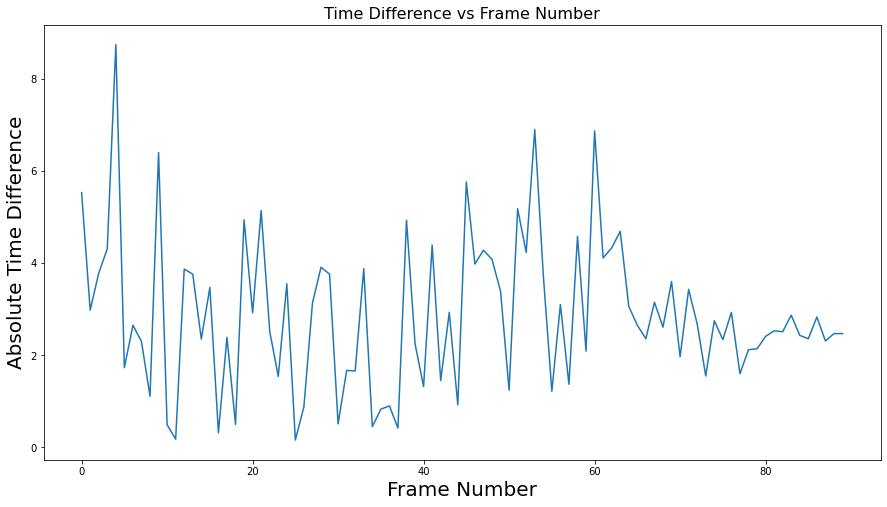

In [8]:
plt.figure(figsize=(15,8))
plt.plot(range(T-2), time_difference)
plt.title("Time Difference vs Frame Number", fontsize=16)
plt.xlabel("Frame Number", fontsize=20)
plt.ylabel("Absolute Time Difference", fontsize=20)

(-6.0, 6.0)

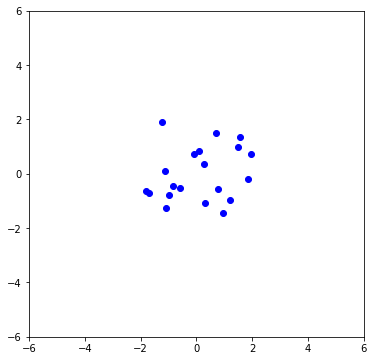

In [9]:
uniform_points = np.random.uniform(-2,2,(20,2))
plt.figure(figsize=(6,6))
plt.plot(uniform_points[:,0],uniform_points[:,1],'bo')
# plt.plot([-4, 4], [4, 4], color='darkorange', linewidth=2)
# plt.plot([-4, 4], [-4, -4], color='darkorange', linewidth=2)
# plt.plot([4, 4], [-4, 4], color='darkorange', linewidth=2)
# plt.plot([-4, -4], [-4, 4], color='darkorange', linewidth=2)
plt.ylim([-6,6])
plt.xlim([-6,6])